# Optimization of an IoV system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from utils.plots import *
from utils.objects import *
from utils.nsgaii import nsga2, Individual, chromosome_to_network

## Importing the data

In [2]:
rsu = pd.read_csv('data/rsu.csv')
es = pd.read_csv('data/es.csv')
tasks = pd.read_csv('data/tasks.csv')

rsu_bank = populate_rsus(rsu)
es_bank = populate_ess(es)
tasks_bank = populate_tasks(tasks)

# Generating a Network

In [3]:
network = get_random_network(rsu_bank, es_bank)

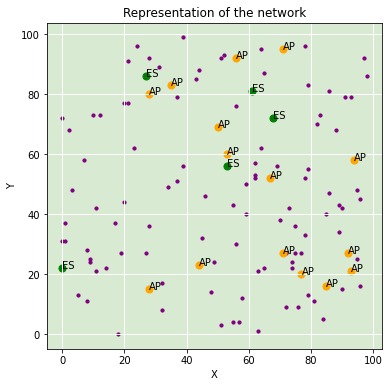

In [4]:
plot_network(network, tasks_bank)

## Looking at the solutions

  0%|          | 0/50 [00:00<?, ?it/s]

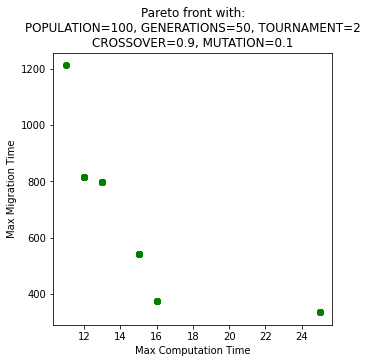

In [5]:
Individual.__instances__ = []

POPULATION_SIZE = 100
MAX_GENERATIONS = 50
TOURNAMENT_SIZE = 2
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1
test = nsga2(POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY, rsu_bank, es_bank)

# Plot the Pareto front
plot_pareto(test, POPULATION_SIZE, MAX_GENERATIONS, TOURNAMENT_SIZE, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

In [13]:
# get individuals where rank == 1
best_individuals = [individual for individual in test if individual.rank == 1]
# get the individuals with different chromosomes
best_individuals = list(set(best_individuals))

# reset the positions of the tasks
tasks = pd.read_csv('data/tasks.csv')
tasks_bank = populate_tasks(tasks)

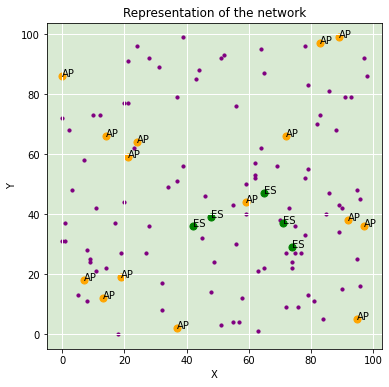

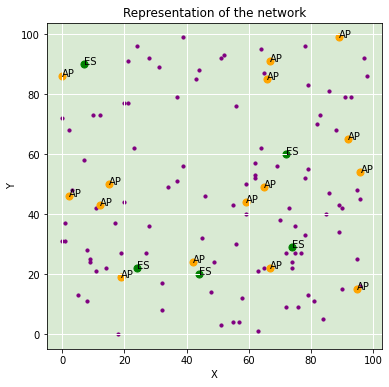

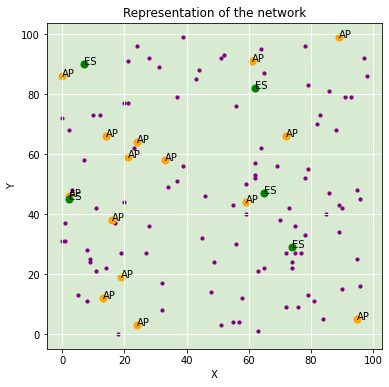

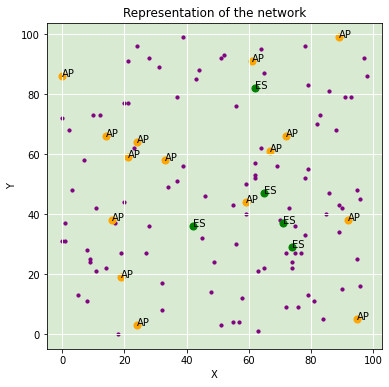

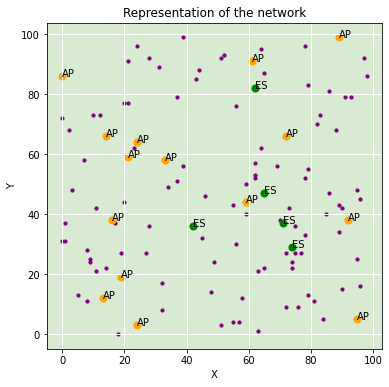

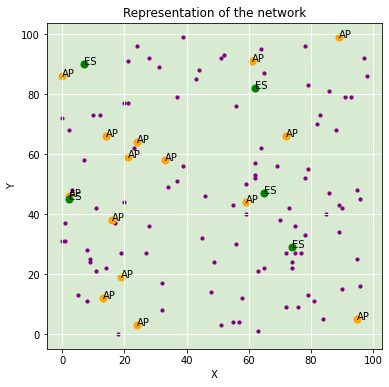

In [14]:
# plots the best solutions of the algorithm
for person in best_individuals:
    network = chromosome_to_network(person.chromosome)
    plot_network(network, tasks_bank)